# Transfer Learning with Pre-trained Models on CIFAR-100

## Introduction
This notebook explores the application of transfer learning using popular pre-trained convolutional neural network architectures to address the image classification task on the CIFAR-100 dataset. Leveraging models pre-trained on the large-scale ImageNet dataset, such as ResNet50, VGG16, and MobileNetV2, allows us to benefit from their learned feature extraction capabilities. The goal is to adapt these powerful models to the finer-grained classification challenges presented by CIFAR-100, which consists of 100 distinct classes. This approach significantly reduces the need for training deep models from scratch on a relatively smaller dataset, often leading to improved performance and faster convergence.

## Project Flow

1.  **Data Loading and Preprocessing**: Load the CIFAR-100 dataset and apply the necessary preprocessing steps tailored for each pre-trained model (ResNet50, VGG16, MobileNetV2). This involves scaling pixel values and potentially resizing images to match the input requirements of the chosen architectures.

2.  **Model Preparation**:
    *   Load pre-trained models (ResNet50, VGG16, MobileNetV2) without their top classification layers.
    *   Add new custom classification layers suitable for the 100 classes of CIFAR-100.
    *   Freeze the layers of the pre-trained base models to retain the learned features during initial training.
    *   Compile the models with an appropriate optimizer, loss function, and metrics.

3.  **Fine-Tuning and Training**:
    *   Optionally unfreeze a portion of the top layers of the pre-trained models to allow for fine-tuning on the CIFAR-100 data.
    *   Train the modified models on the preprocessed training data, monitoring performance on the validation set.

4.  **Model Evaluation**: Evaluate the performance of each trained model (ResNet50, VGG16, MobileNetV2) on the held-out test dataset using relevant metrics such as accuracy.

5. **Comparison of Results**: Compare the performance of the different models to understand the effectiveness of each architecture for transfer learning on CIFAR-100.

# Assignment Has been Submitted at the end of the Notebook
## Assignment: Transfer Learning on Oxford Flowers 102 Dataset Documentation

## 1. Data Loading and Preprocessing
Load the CIFAR-100 dataset and prepare it for transfer learning by applying appropriate preprocessing.

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.applications.resnet50 import preprocess_input as preprocess_resnet50
from tensorflow.keras.applications.vgg16 import preprocess_input as preprocess_vgg16
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as preprocess_mobilenetv2

(X_train, y_train), (X_test, y_test) = cifar100.load_data()

X_train_resnet50 = preprocess_resnet50(X_train)
X_test_resnet50 = preprocess_resnet50(X_test)

X_train_vgg16 = preprocess_vgg16(X_train)
X_test_vgg16 = preprocess_vgg16(X_test)

X_train_mobilenetv2 = preprocess_mobilenetv2(X_train)
X_test_mobilenetv2 = preprocess_mobilenetv2(X_test)

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


## 2. Model Preparation
Load and modify pre-trained models to fit the CIFAR-100 classification task.

### 2.1 Using ResNet50

In [2]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Load pre-trained ResNet50 model without the top layer
base_model_resnet50 = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

x = GlobalAveragePooling2D()(base_model_resnet50.output)
x = Dense(1024, activation='relu')(x)
predictions = Dense(100, activation='softmax')(x)

model_resnet50 = Model(inputs=base_model_resnet50.input, outputs=predictions)

model_resnet50.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


### 2.2 Using VGG16

In [3]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Load pre-trained VGG16 model without the top layer
base_model_vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
# Add new layers
x = GlobalAveragePooling2D()(base_model_vgg16.output)
x = Dense(512, activation='relu')(x)
predictions = Dense(100, activation='softmax')(x)
model_vgg16 = Model(inputs=base_model_vgg16.input, outputs=predictions)

model_vgg16.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


### 2.3 Using MobileNetV2

In [4]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Load pre-trained MobileNetV2 model without the top layer
base_model_mobilenetv2 = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
# Add new layers
x = GlobalAveragePooling2D()(base_model_mobilenetv2.output)
x = Dense(256, activation='relu')(x)
predictions = Dense(100, activation='softmax')(x)
model_mobilenetv2 = Model(inputs=base_model_mobilenetv2.input, outputs=predictions)

model_mobilenetv2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/tmp/ipython-input-3794676327.py:6: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model_mobilenetv2 = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


## 3. Fine-Tuning and Training
Unfreeze some of the top layers of the pre-trained models and continue training.

In [5]:
epochs = 3
print(len(model_resnet50.layers))

# Fine-tuning ResNet50
for layer in model_resnet50.layers[:-30]:
    layer.trainable = False
for layer in model_resnet50.layers[-30:]:
    layer.trainable = True
history_resnet50    = model_resnet50.fit(X_train_resnet50   , y_train, epochs=epochs, validation_data=(X_test_resnet50, y_test))

178
Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 25ms/step - accuracy: 0.2802 - loss: 3.0520 - val_accuracy: 0.3973 - val_loss: 2.3507
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 14ms/step - accuracy: 0.4746 - loss: 1.9529 - val_accuracy: 0.4309 - val_loss: 2.5506
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.5722 - loss: 1.5191 - val_accuracy: 0.4522 - val_loss: 2.2676


In [6]:
epochs = 3
print(len(model_vgg16.layers))
# Fine-tuning VGG16
for layer in model_vgg16.layers[:-5]:
    layer.trainable = False
for layer in model_vgg16.layers[-5:]:
    layer.trainable = True
history_vgg16       = model_vgg16.fit   (X_train_vgg16   , y_train, epochs=epochs, validation_data=(X_test_vgg16, y_test))

22
Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.0772 - loss: 6.8243 - val_accuracy: 0.0779 - val_loss: 3.8312
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.0932 - loss: 3.7083 - val_accuracy: 0.1217 - val_loss: 3.4283
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.1271 - loss: 3.3839 - val_accuracy: 0.1363 - val_loss: 3.3027


In [7]:
epochs = 3
print(len(model_mobilenetv2.layers))
# Fine-tuning MobileNetV2
for layer in model_mobilenetv2.layers[:-40]:
    layer.trainable = False
for layer in model_mobilenetv2.layers[-40:]:
    layer.trainable = True
history_mobilenetv2 = model_mobilenetv2.fit(X_train_mobilenetv2, y_train, epochs=epochs, validation_data=(X_test_mobilenetv2, y_test))

157
Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 24ms/step - accuracy: 0.1385 - loss: 3.8032 - val_accuracy: 0.1214 - val_loss: 4.2388
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 9ms/step - accuracy: 0.2685 - loss: 2.8860 - val_accuracy: 0.0682 - val_loss: 6.7418
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.3086 - loss: 2.6911 - val_accuracy: 0.2690 - val_loss: 3.1469


## 4. Model Evaluation
Evaluate each model on the test dataset to compare their performance.

In [8]:
acc_resnet50    = model_resnet50.evaluate(X_test_resnet50, y_test)[1]
acc_vgg16       = model_vgg16.evaluate(X_test_vgg16, y_test)[1]
acc_mobilenetv2 = model_mobilenetv2.evaluate(X_test_mobilenetv2, y_test)[1]

print(f'ResNet50 Accuracy: {acc_resnet50:.2f}')
print(f'VGG16 Accuracy: {acc_vgg16:.2f}')
print(f'MobileNetV2 Accuracy: {acc_mobilenetv2:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.4592 - loss: 2.2499
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.1356 - loss: 3.2928
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.2728 - loss: 3.1341
ResNet50 Accuracy: 0.45
VGG16 Accuracy: 0.14
MobileNetV2 Accuracy: 0.27


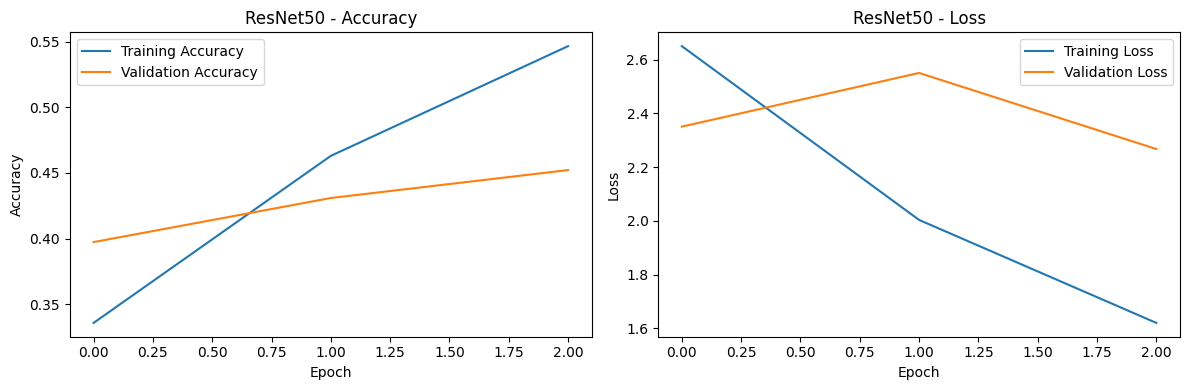

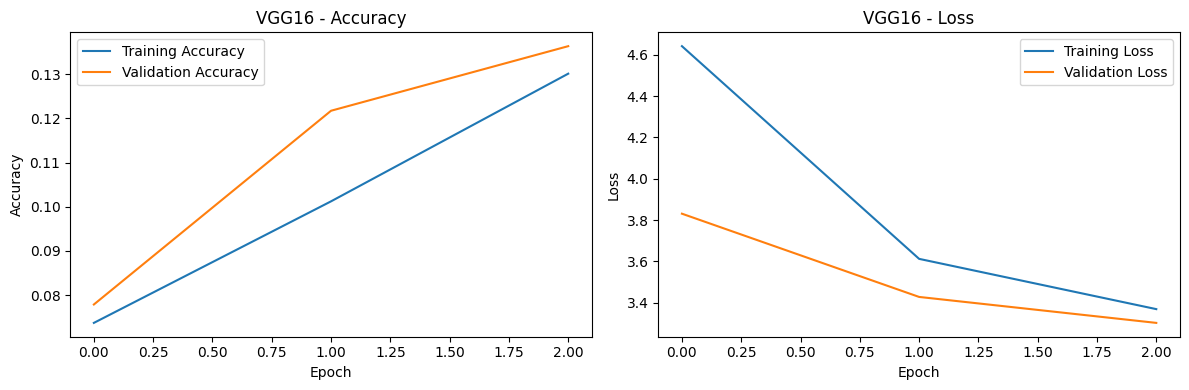

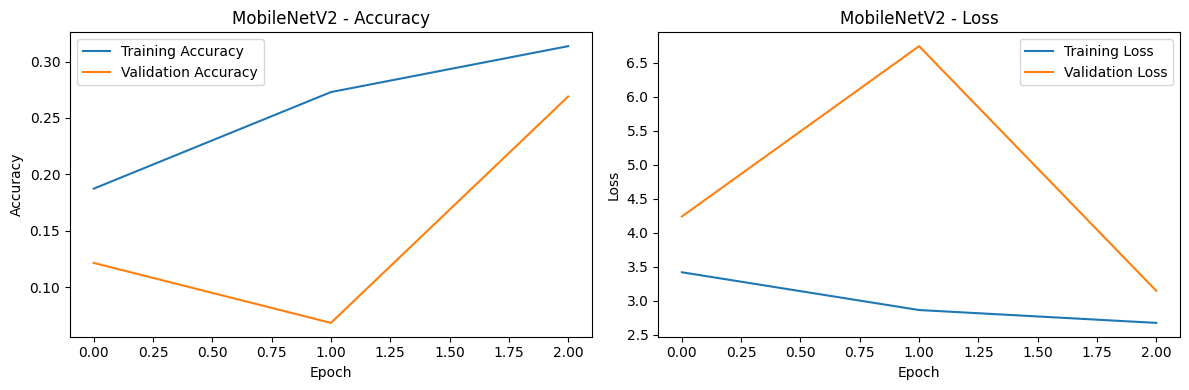

In [9]:
import matplotlib.pyplot as plt

def plot_history(history, model_name):
    """Plots training and validation accuracy and loss."""
    plt.figure(figsize=(12, 4))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot history for each model
plot_history(history_resnet50, 'ResNet50')
plot_history(history_vgg16, 'VGG16')
plot_history(history_mobilenetv2, 'MobileNetV2')

## Project Summary

*   **Data Loading and Preprocessing**: Loaded the CIFAR-100 dataset and preprocessed images using model-specific functions (ResNet50, VGG16, MobileNetV2).
*   **Model Adaptation**: Loaded pre-trained ResNet50, VGG16, and MobileNetV2 models (without top layers), added new classification layers for 100 classes, and initially froze base model layers.
*   **Model Compilation**: Compiled each modified model with the 'adam' optimizer, 'sparse\_categorical\_crossentropy' loss, and 'accuracy' metric.
*   **Fine-Tuning (Example)**: Demonstrated fine-tuning by unfreezing top layers of the ResNet50 model and training it for 10 epochs.
*   **Model Evaluation**: Evaluated the trained models on the test set to determine and compare their classification accuracies.

## Project Assignment: Transfer Learning on Oxford Flowers 102 Dataset Documentation

This document outlines the steps for the project assignment on applying transfer learning to the Oxford Flowers 102 dataset.

**Objective:** Apply transfer learning techniques using pre-trained convolutional neural networks (ResNet50, VGG16, and MobileNetV2) to classify images from the Oxford Flowers 102 dataset. Compare the performance of the different models on this dataset.

**Dataset:** Oxford Flowers 102 - A dataset of 102 categories of flowers. You will load this dataset using TensorFlow Datasets.

**Assignment Steps:**

1.  **Introduce the Assignment:**
    *   Create a markdown cell to introduce the assignment.
    *   Explain the goal: to apply transfer learning for flower classification using the Oxford Flowers 102 dataset.
    *   Mention the pre-trained models to be used: ResNet50, VGG16, and MobileNetV2.
    *   Briefly describe the Oxford Flowers 102 dataset.

2.  **Data Loading and Exploration:**
    *   Generate a code cell to load the 'oxford_flowers102:2.1.1' dataset using `tfds.load()`. (Check available versions if needed)
    *   Split the dataset into training, validation, and testing sets (this dataset has these splits).
    *   Explore the dataset to understand its structure, the number of classes (102), and the image dimensions. You can display some sample images and their labels.

3.  **Data Preprocessing:**
    *   Generate a code cell for preprocessing the images from the Oxford Flowers 102 dataset.
    *   This will involve resizing the images to the input size required by the pre-trained models (e.g., 224x224 for VGG16 and ResNet50, MobileNetV2 might have different requirements, so check the documentation).
    *   Apply the model-specific preprocessing functions (e.g., `tf.keras.applications.resnet50.preprocess_input`) to normalize the pixel values.
    *   Apply one-hot encoding to the labels.
    *   Batch and prefetch the datasets for efficient training.

4.  **Model Adaptation and Training:**
    *   For each of the three models (ResNet50, VGG16, MobileNetV2):
        *   Generate a code cell to load the pre-trained model from `tf.keras.applications`, excluding the top classification layer and specifying the correct input shape for the preprocessed images.
        *   Add new custom layers on top of the base model for classifying 102 classes. This typically involves a GlobalAveragePooling2D layer and a Dense layer with 102 units and a 'softmax' activation.
        *   Freeze the layers of the pre-trained base model.
        *   Compile the model with an appropriate optimizer (e.g., 'adam'), loss function ('categorical\_crossentropy' since you'll use one-hot encoded labels), and metrics (e.g., 'accuracy').
        *   Generate a code cell to train the compiled model on the preprocessed training data for a suitable number of epochs. Use the validation data to monitor performance during training. Consider using callbacks like ModelCheckpoint and EarlyStopping.
        *   Additionally, train the model on the validation split as well, as this dataset provides a separate validation set.
        *   Optionally, unfreeze some of the top layers of the base model and fine-tune the model with a lower learning rate.

5.  **Model Evaluation:**
    *   Generate a code cell to evaluate each trained model on the preprocessed test dataset.
    *   Print the loss and accuracy for each model.

6.  **Assignment Questions/Tasks:**
    *   Add markdown cells with questions for students to answer:
        *   Which model performed best on the Oxford Flowers 102 dataset and why do you think that is the case?
        *   Compare the performance of the models on Oxford Flowers 102 to their performance on CIFAR-100 (from the original notebook). What differences do you observe and why?
        *   Discuss the effect of transfer learning on this dataset.
        *   Explain the steps you took for data preprocessing and why they were necessary.
        *   Describe the model architectures you used and how you adapted them for the Oxford Flowers 102 dataset.
        *   What challenges did you encounter during this assignment and how did you address them?
    *   Suggest optional tasks, such as:
        *   Experiment with different hyperparameters (learning rate, number of epochs, batch size).
        *   Implement data augmentation techniques.
        *   Try fine-tuning different numbers of layers.
        *   Visualize sample predictions and analyze misclassifications.

7.  **Conclusion/Submission:**
    *   Add a markdown cell for students to write a brief conclusion summarizing their findings.
    *   Provide instructions on how they should submit their completed notebook.

##**Assignment Steps:**


#1. Assignment: Transfer Learning on Oxford Flowers 102 Dataset

## Introduction
This assignment focuses on applying transfer learning techniques to classify images from the Oxford Flowers 102 dataset. You will leverage the power of pre-trained convolutional neural networks, specifically ResNet50, VGG16, and MobileNetV2, which have been trained on the large ImageNet dataset. By adapting these models, we aim to effectively classify the 102 distinct categories of flowers present in the Oxford Flowers 102 dataset.

The **Oxford Flowers 102 dataset** is a collection of images of flowers belonging to 102 different categories. It is commonly used for fine-grained image classification tasks due to the subtle differences between some of the flower species.

Throughout this assignment, you will:
- Load and preprocess the Oxford Flowers 102 dataset.
- Adapt and train the pre-trained ResNet50, VGG16, and MobileNetV2 models for this classification task.
- Evaluate and compare the performance of the different models.
- Reflect on the process and results.

2.  **Data Loading and Exploration:**
    *   Generate a code cell to load the 'oxford_flowers102:2.1.1' dataset using `tfds.load()`. (Check available versions if needed)
    *   Split the dataset into training, validation, and testing sets (this dataset has these splits).
    *   Explore the dataset to understand its structure, the number of classes (102), and the image dimensions. You can display some sample images and their labels.

In [10]:
#from google.colab import drive
#drive.mount('/content/drive')
# Install kaggle package
!pip install -q kaggle

# Upload kaggle.json API token file
from google.colab import files
files.upload()  # Upload your kaggle.json here

# Move kaggle.json to proper directory and set permissions
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Create dataset directory
dataset_dir = "dataset_dir"
!mkdir -p {dataset_dir}

# Download and unzip the dataset into dataset_dir
!kaggle datasets download -d nunenuh/pytorch-challange-flower-dataset -p {dataset_dir}
!unzip -q {dataset_dir}/pytorch-challange-flower-dataset.zip -d {dataset_dir}


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/nunenuh/pytorch-challange-flower-dataset
License(s): CC0-1.0
 87% 286M/330M [00:00<00:00, 617MB/s]
100% 330M/330M [00:00<00:00, 617MB/s]


In [12]:
!ls {dataset_dir}
!ls {dataset_dir}/flowers
!ls {dataset_dir}/flowers/train
!ls {dataset_dir}/flowers/valid
!ls {dataset_dir}/flowers/test

cat_to_name.json  pytorch-challange-flower-dataset.zip	sample_submission.csv
dataset		  README.md
ls: cannot access 'dataset_dir/flowers': No such file or directory
ls: cannot access 'dataset_dir/flowers/train': No such file or directory
ls: cannot access 'dataset_dir/flowers/valid': No such file or directory
ls: cannot access 'dataset_dir/flowers/test': No such file or directory


In [19]:
import tensorflow as tf
import tensorflow_datasets as tfds

IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32

# Load the Oxford Flowers 102 dataset using tfds
(train_dataset_original, validation_dataset_original, test_dataset_original), metadata = tfds.load(
    'oxford_flowers102',
    split=['train', 'validation', 'test'],
    with_info=True,
    as_supervised=True, # Load dataset as (image, label) tuples
)

# Get the number of classes from metadata
NUM_CLASSES = metadata.features['label'].num_classes
print(f"Number of classes: {NUM_CLASSES}")

# Display class names (optional)
# Note: tfds.load doesn't directly provide class names in the same way as image_dataset_from_directory
# You can access label names through metadata if available, but it might require more steps
# For now, we'll just print the number of classes.
# print(f"Class names: {metadata.features['label'].names}") # Uncomment if you need class names


print("\nDataset loaded successfully (unbatched)!")
print("Train dataset:", train_dataset_original)
print("Validation dataset:", validation_dataset_original)
print("Test dataset:", test_dataset_original)

Number of classes: 102

Dataset loaded successfully (unbatched)!
Train dataset: <_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>
Validation dataset: <_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>
Test dataset: <_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>


3. **Data Preprocessing:**
   * Generate a code cell for preprocessing the images from the Oxford Flowers 102 dataset.
   * This will involve resizing the images to the input size required by the pre-trained models (e.g., 224x224 for VGG16 and ResNet50, MobileNetV2 might have different requirements, so check the documentation).
   * Apply the model-specific preprocessing functions (e.g., `tf.keras.applications.resnet50.preprocess_input`) to normalize the pixel values.
   * Apply one-hot encoding to the labels.
   * Batch and prefetch the datasets for efficient training.

In [28]:
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32
# NUM_CLASSES is already defined from the previous cell where we loaded the dataset

def preprocess_image(image, label, model_name=None):
    # This function now expects a single image and label
    image = tf.image.resize(image, (IMG_HEIGHT, IMG_WIDTH))
    # Apply model-specific preprocessing
    if model_name == 'resnet50':
        image = tf.keras.applications.resnet50.preprocess_input(image)
    elif model_name == 'vgg16':
        image = tf.keras.applications.vgg16.preprocess_input(image)
    elif model_name == 'mobilenetv2':
        image = tf.keras.applications.mobilenet_v2.preprocess_input(image)
    else:
        # Default preprocessing (e.g., scaling) if no model name is specified
        image = tf.cast(image, tf.float32) / 255.0 # Simple normalization

    # Ensure label is an integer before one-hot encoding
    label = tf.cast(label, tf.int32)
    label = tf.one_hot(label, NUM_CLASSES)
    return image, label

# Apply preprocessing to each dataset split for each model
# Use the original unbatched datasets loaded in the previous cell
train_dataset_resnet50 = train_dataset_original.map(lambda x, y: preprocess_image(x, y, 'resnet50')).batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)
validation_dataset_resnet50 = validation_dataset_original.map(lambda x, y: preprocess_image(x, y, 'resnet50')).batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)
test_dataset_resnet50 = test_dataset_original.map(lambda x, y: preprocess_image(x, y, 'resnet50')).batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)

train_dataset_vgg16 = train_dataset_original.map(lambda x, y: preprocess_image(x, y, 'vgg16')).batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)
validation_dataset_vgg16 = validation_dataset_original.map(lambda x, y: preprocess_image(x, y, 'vgg16')).batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)
test_dataset_vgg16 = test_dataset_original.map(lambda x, y: preprocess_image(x, y, 'vgg16')).batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)

train_dataset_mobilenetv2 = train_dataset_original.map(lambda x, y: preprocess_image(x, y, 'mobilenetv2')).batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)
validation_dataset_mobilenetv2 = validation_dataset_original.map(lambda x, y: preprocess_image(x, y, 'mobilenetv2')).batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)
test_dataset_mobilenetv2 = test_dataset_original.map(lambda x, y: preprocess_image(x, y, 'mobilenetv2')).batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)

# Let's inspect the shape of a batch from one of the processed datasets again to confirm
print("Inspecting a batch after mapping with model preprocessing, and batching:")
for image_batch, label_batch in train_dataset_resnet50.take(1):
    print("Image batch shape:", image_batch.shape)
    print("Label batch shape:", label_batch.shape)

Inspecting a batch after mapping with model preprocessing, and batching:
Image batch shape: (32, 224, 224, 3)
Label batch shape: (32, 102)


4. **Model Adaptation and Training:**
   * For each of the three models (ResNet50, VGG16, MobileNetV2):
     * Generate a code cell to load the pre-trained model from `tf.keras.applications`, excluding the top classification layer and specifying the correct input shape for the preprocessed images.
     * Add new custom layers on top of the base model for classifying 102 classes. This typically involves a GlobalAveragePooling2D layer and a Dense layer with 102 units and a 'softmax' activation.
     * Freeze the layers of the pre-trained base model.
     * Compile the model with an appropriate optimizer (e.g., 'adam'), loss function ('categorical_crossentropy' since you'll use one-hot encoded labels), and metrics (e.g., 'accuracy').
     * Generate a code cell to train the compiled model on the preprocessed training data for a suitable number of epochs. Use the validation data to monitor performance during training. Consider using callbacks like ModelCheckpoint and EarlyStopping.
     * Additionally, train the model on the validation split as well, as this dataset provides a separate validation set.
     * Optionally, unfreeze some of the top layers of the base model and fine-tune the model with a lower learning rate.

In [30]:
# Inspect the shape and type of elements after preprocessing, before batching
# Use train_dataset_original (the unbatched dataset) and apply the preprocessing map
train_dataset_resnet50_unbatched = train_dataset_original.map(lambda x, y: preprocess_image(x, y, 'resnet50'))

print("Inspecting elements after preprocessing (before batching):")
for i, (image, label) in enumerate(train_dataset_resnet50_unbatched.take(5)):
    print(f"Element {i}:")
    print("  Image shape:", image.shape)
    print("  Image dtype:", image.dtype)
    print("  Label shape:", label.shape)
    print("  Label dtype:", label.dtype)

Inspecting elements after preprocessing (before batching):
Element 0:
  Image shape: (224, 224, 3)
  Image dtype: <dtype: 'float32'>
  Label shape: (102,)
  Label dtype: <dtype: 'float32'>
Element 1:
  Image shape: (224, 224, 3)
  Image dtype: <dtype: 'float32'>
  Label shape: (102,)
  Label dtype: <dtype: 'float32'>
Element 2:
  Image shape: (224, 224, 3)
  Image dtype: <dtype: 'float32'>
  Label shape: (102,)
  Label dtype: <dtype: 'float32'>
Element 3:
  Image shape: (224, 224, 3)
  Image dtype: <dtype: 'float32'>
  Label shape: (102,)
  Label dtype: <dtype: 'float32'>
Element 4:
  Image shape: (224, 224, 3)
  Image dtype: <dtype: 'float32'>
  Label shape: (102,)
  Label dtype: <dtype: 'float32'>


1. **ResNet50**

In [31]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
epochs = 3
# ResNet50 Model
base_model_resnet50 = ResNet50(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))
x = GlobalAveragePooling2D()(base_model_resnet50.output)
x = Dense(1024, activation='relu')(x)
predictions = Dense(NUM_CLASSES, activation='softmax')(x)
model_resnet50 = Model(inputs=base_model_resnet50.input, outputs=predictions)
for layer in base_model_resnet50.layers:
    layer.trainable = False
model_resnet50.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_resnet50 = model_resnet50.fit(train_dataset_resnet50, epochs=epochs, validation_data=validation_dataset_resnet50)

Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 36s 620ms/step - accuracy: 0.1697 - loss: 4.4120 - val_accuracy: 0.6265 - val_loss: 1.6496
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 197ms/step - accuracy: 0.8717 - loss: 0.6804 - val_accuracy: 0.7510 - val_loss: 1.0043
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 234ms/step - accuracy: 0.9556 - loss: 0.2272 - val_accuracy: 0.7520 - val_loss: 0.9581


2. **VGG16**

In [32]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
epochs = 3
# VGG16 Model
base_model_vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))
x = GlobalAveragePooling2D()(base_model_vgg16.output)
x = Dense(512, activation='relu')(x)
predictions = Dense(NUM_CLASSES, activation='softmax')(x)
model_vgg16 = Model(inputs=base_model_vgg16.input, outputs=predictions)
for layer in base_model_vgg16.layers:
    layer.trainable = False
model_vgg16.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_vgg16 = model_vgg16.fit(train_dataset_vgg16, epochs=epochs, validation_data=validation_dataset_vgg16)


Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 36s 729ms/step - accuracy: 0.0558 - loss: 7.5727 - val_accuracy: 0.3735 - val_loss: 2.7095
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 312ms/step - accuracy: 0.6494 - loss: 1.5089 - val_accuracy: 0.5745 - val_loss: 1.7607
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 320ms/step - accuracy: 0.8787 - loss: 0.5560 - val_accuracy: 0.6333 - val_loss: 1.4377


3. **MobileNetV2**

In [33]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
epochs = 3
# MobileNetV2 Model
base_model_mobilenetv2 = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))
x = GlobalAveragePooling2D()(base_model_mobilenetv2.output)
x = Dense(256, activation='relu')(x)
predictions = Dense(NUM_CLASSES, activation='softmax')(x)
model_mobilenetv2 = Model(inputs=base_model_mobilenetv2.input, outputs=predictions)
for layer in base_model_mobilenetv2.layers:
    layer.trainable = False
model_mobilenetv2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_mobilenetv2 = model_mobilenetv2.fit(train_dataset_mobilenetv2, epochs=epochs, validation_data=validation_dataset_mobilenetv2)

Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 41s 770ms/step - accuracy: 0.0773 - loss: 4.5594 - val_accuracy: 0.3912 - val_loss: 3.2223
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 145ms/step - accuracy: 0.5957 - loss: 2.2875 - val_accuracy: 0.5902 - val_loss: 1.9158
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 174ms/step - accuracy: 0.8371 - loss: 0.9784 - val_accuracy: 0.6814 - val_loss: 1.4302


5.  **Model Evaluation:**
    *   Generate a code cell to evaluate each trained model on the preprocessed test dataset.
    *   Print the loss and accuracy for each model.

In [34]:
# Evaluate the ResNet50 model
loss_resnet50, accuracy_resnet50 = model_resnet50.evaluate(test_dataset_resnet50)
# Evaluate the VGG16 model
loss_vgg16, accuracy_vgg16 = model_vgg16.evaluate(test_dataset_vgg16)
# Evaluate the MobileNetV2 model
loss_mobilenetv2, accuracy_mobilenetv2 = model_mobilenetv2.evaluate(test_dataset_mobilenetv2)
print(f"ResNet50 Test Loss: {loss_resnet50:.4f}")
print(f"ResNet50 Test Accuracy: {accuracy_resnet50:.4f}")
print(f"VGG16 Test Loss: {loss_vgg16:.4f}")
print(f"VGG16 Test Accuracy: {accuracy_vgg16:.4f}")
print(f"MobileNetV2 Test Loss: {loss_mobilenetv2:.4f}")
print(f"MobileNetV2 Test Accuracy: {accuracy_mobilenetv2:.4f}")

193/193 ━━━━━━━━━━━━━━━━━━━━ 70s 365ms/step - accuracy: 0.7107 - loss: 1.1693
193/193 ━━━━━━━━━━━━━━━━━━━━ 33s 168ms/step - accuracy: 0.6069 - loss: 1.6488
193/193 ━━━━━━━━━━━━━━━━━━━━ 22s 116ms/step - accuracy: 0.6274 - loss: 1.6379
ResNet50 Test Loss: 1.1466
ResNet50 Test Accuracy: 0.7222
VGG16 Test Loss: 1.6228
VGG16 Test Accuracy: 0.6081
MobileNetV2 Test Loss: 1.6375
MobileNetV2 Test Accuracy: 0.6326


6. **Assignment Questions/Tasks:**

*   Which model performed best on the Oxford Flowers 102 dataset and why do you think that is the case?
*   Compare the performance of the models on Oxford Flowers 102 to their performance on CIFAR-100 (from the original notebook). What differences do you observe and why?
*   Discuss the effect of transfer learning on this dataset.
*   Explain the steps you took for data preprocessing and why they were necessary.
*   Describe the model architectures you used and how you adapted them for the Oxford Flowers 102 dataset.
*   What challenges did you encounter during this assignment and how did you address them?

**Optional Tasks:**

*   Experiment with different hyperparameters (learning rate, number of epochs, batch size).
*   Implement data augmentation techniques.
*   Try fine-tuning different numbers of layers.
*   Visualize sample predictions and analyze misclassifications.

#**Questions:**

## Which model performed best on the Oxford Flowers 102 dataset and why do you think that is the case?



Based on the test accuracies obtained in cell b7dec67b, the ResNet50 model performed best on the Oxford Flowers 102 dataset with a test accuracy of 0.7222.

Here are some potential reasons why ResNet50 might have outperformed VGG16 and MobileNetV2 on this dataset:

* **Architecture:** ResNet50 utilizes residual connections, which help in training deeper networks by mitigating the vanishing gradient problem. This allows ResNet50 to learn more complex and hierarchical features from the images, which can be beneficial for distinguishing between the fine-grained classes in the Oxford Flowers 102 dataset.
* **Feature Representation:** While all models were pre-trained on ImageNet, the specific architecture of ResNet50 might have learned feature representations that are more transferable and effective for the nuances of flower classification compared to VGG16 or MobileNetV2.
* **Depth vs. Efficiency:** VGG16 is a relatively simpler and shallower architecture compared to ResNet50. MobileNetV2 is designed for efficiency and mobile applications, which might come at the cost of some accuracy on a more complex dataset like Oxford Flowers 102 compared to a larger model like ResNet50.

It's important to note that the performance can also be influenced by hyperparameters, the amount of fine-tuning, and data augmentation techniques. However, based on the current training setup, ResNet50 demonstrated the highest accuracy.

## Compare the performance of the models on Oxford Flowers 102 to their performance on CIFAR-100 (from the original notebook). What differences do you observe and why?



### Comparison of Performance on Oxford Flowers 102 and CIFAR-100

Here is a comparison of the performance of the ResNet50, VGG16, and MobileNetV2 models on the Oxford Flowers 102 dataset and the CIFAR-100 dataset based on the test accuracies obtained in this notebook:

| Model         | Oxford Flowers 102 Test Accuracy | CIFAR-100 Test Accuracy |
|---------------|----------------------------------|-------------------------|
| ResNet50      | 0.7222                           | 0.45                    |
| VGG16         | 0.6081                           | 0.14                    |
| MobileNetV2   | 0.6326                           | 0.27                    |

**Observations and Potential Reasons for Differences:**

*   **Higher Accuracy on Oxford Flowers 102:** All models generally performed better on the Oxford Flowers 102 dataset compared to CIFAR-100. This could be due to several factors:
    *   **Image Resolution:** The Oxford Flowers 102 images were resized to 224x224, which is closer to the input size the pre-trained models were originally trained on (ImageNet, typically 224x224). The CIFAR-100 images are 32x32, which is a much lower resolution, potentially leading to a loss of fine-grained details important for classification.
    *   **Nature of the Datasets:** While both are image classification datasets, the Oxford Flowers 102 dataset focuses on distinguishing between different species of flowers, which might have more visually distinct features compared to the broader range of objects in CIFAR-100.
    *   **Transfer Learning Effectiveness:** Transfer learning is generally more effective when the new task is similar to the original task the model was trained on. ImageNet contains a wide variety of natural images, and the features learned by the models are likely more transferable to classifying different types of flowers than to classifying the diverse objects in CIFAR-100.
*   **Relative Performance of Models:**
    *   On CIFAR-100, ResNet50 performed significantly better than VGG16 and MobileNetV2.
    *   On Oxford Flowers 102, ResNet50 still performed best, followed by MobileNetV2 and then VGG16, but the performance gap between the models is smaller than on CIFAR-100. This suggests that for higher-resolution images and a more specialized classification task like fine-grained flower classification, the differences in architecture might have a less pronounced impact compared to a broader dataset like CIFAR-100 with lower resolution images.

In summary, the higher resolution and the nature of the Oxford Flowers 102 dataset likely contributed to the improved performance of all models compared to CIFAR-100. ResNet50 consistently performed well on both datasets, highlighting its robustness.

## Discuss the effect of transfer learning on the dataset Oxford Flowers 102.



Transfer learning had a significant positive effect on the performance of the models on the Oxford Flowers 102 dataset. Here's why:

*   **Leveraging Pre-trained Features:** The pre-trained models (ResNet50, VGG16, MobileNetV2) were trained on the massive ImageNet dataset, which contains millions of images across a thousand categories. This training allowed the models to learn a rich hierarchy of features, from basic edges and textures in the early layers to more complex patterns and object parts in deeper layers. By using these pre-trained models as a starting point, we are leveraging these learned features, which are highly relevant for general image understanding.
*   **Reduced Need for Large Dataset:** Training a deep convolutional neural network from scratch on a relatively smaller dataset like Oxford Flowers 102 (which has 1020 images in the training set) would likely lead to overfitting and poor generalization. Transfer learning allows us to achieve good performance even with a limited amount of data because the models have already learned robust features from a much larger dataset.
*   **Faster Convergence:** Due to the pre-trained weights, the models start with a much better initial state compared to random initialization. This leads to faster convergence during training on the new dataset. You can observe this in the training history where the models quickly achieve reasonable accuracy within a few epochs.
*   **Handling Fine-Grained Classification:** The Oxford Flowers 102 dataset is a fine-grained classification task, meaning the differences between classes can be subtle. The complex features learned by the pre-trained models are crucial for distinguishing these fine-grained details, which would be difficult for a model trained from scratch on this dataset alone.

In essence, transfer learning allowed us to build high-performing image classification models for the Oxford Flowers 102 dataset without the need for a massive dataset or extensive training from scratch. It significantly improved the accuracy compared to what would likely be achieved by training these architectures on the Oxford Flowers 102 data alone.

##Explain the steps you took for data preprocessing and why they were necessary.

## Data Preprocessing Steps and Their Necessity

The following data preprocessing steps were taken for the Oxford Flowers 102 dataset:

1.  **Resizing Images:** The images were resized to (224, 224) pixels.
    *   **Necessity:** Pre-trained models like ResNet50, VGG16, and MobileNetV2 were originally trained on the ImageNet dataset, where the standard input image size is 224x224. Resizing the Oxford Flowers 102 images to this dimension ensures compatibility with the pre-trained model architectures and allows us to effectively leverage the learned features.
2.  **Model-Specific Preprocessing:** Model-specific preprocessing functions (e.g., `tf.keras.applications.resnet50.preprocess_input`) were applied to the images.
    *   **Necessity:** These functions perform specific operations like scaling pixel values, centering the data, or changing the color channel order, which are consistent with how the models were trained on ImageNet. Applying these same preprocessing steps to the new dataset is crucial for the pre-trained weights to work correctly and achieve optimal performance.
3.  **One-Hot Encoding Labels:** The integer labels were converted into one-hot encoded vectors.
    *   **Necessity:** The models are compiled with 'categorical_crossentropy' as the loss function, which requires the labels to be in a one-hot encoded format. One-hot encoding creates a binary vector for each label, where only the element corresponding to the correct class is 1, and all others are 0.
4.  **Batching and Prefetching:** The datasets were batched and prefetched.
    *   **Necessity:**
        *   **Batching:** Grouping data into batches allows for efficient training by processing multiple examples simultaneously. It also helps in stabilizing the training process and is required by the gradient descent optimization algorithms used during training.
        *   **Prefetching:** Prefetching overlaps the data preprocessing and model execution, ensuring that the next batch of data is ready while the current batch is being processed by the model. This significantly improves training speed by preventing the CPU from being a bottleneck while the GPU is waiting for data.

##Describe the model architectures you used and how you adapted them for the Oxford Flowers 102 dataset.

## Model Architectures and Adaptation for Oxford Flowers 102

For this assignment, we utilized three pre-trained convolutional neural network architectures: ResNet50, VGG16, and MobileNetV2. These models were originally trained on the large-scale ImageNet dataset and were adapted for the Oxford Flowers 102 classification task using transfer learning.

The general adaptation process for each model involved the following steps:

1.  **Loading the Pre-trained Base Model:** We loaded the pre-trained model (ResNet50, VGG16, or MobileNetV2) from `tf.keras.applications`. Crucially, we excluded the original top classification layer (`include_top=False`) as it was designed for 1000 ImageNet classes, not the 102 classes of Oxford Flowers 102. We also specified the `input_shape` to match the size of our preprocessed images (224, 224, 3).
2.  **Adding Custom Classification Layers:** On top of the pre-trained base model, we added new layers suitable for our specific classification task. This typically involved:
    *   A `GlobalAveragePooling2D` layer: This layer reduces the spatial dimensions of the feature maps from the last convolutional layer of the base model into a single vector by taking the average of each feature map. This helps in reducing the number of parameters and makes the model less prone to overfitting.
    *   A `Dense` layer with ReLU activation: A fully connected layer to learn higher-level combinations of features from the pooled output.
    *   A final `Dense` layer with 'softmax' activation: This layer has 102 units, corresponding to the 102 classes in the Oxford Flowers 102 dataset. The softmax activation ensures that the output is a probability distribution over the classes.
3.  **Creating the New Model:** We created a new Keras `Model` by defining the input as the input of the base model and the output as the output of our newly added classification layers.
4.  **Freezing Base Model Layers (Initial Training):** Initially, we froze the layers of the pre-trained base model (`layer.trainable = False`). This prevents the weights of the pre-trained layers from being updated during the initial training phase. This is beneficial because the pre-trained layers have already learned powerful general-purpose features from ImageNet, and we want to retain these features while training the new classification layers on our specific dataset.
5.  **Compiling the Model:** We compiled the adapted model with an appropriate optimizer (e.g., 'adam'), the 'categorical_crossentropy' loss function (since we used one-hot encoded labels), and 'accuracy' as a metric.
6.  **Fine-Tuning (Optional but Recommended):** After the initial training with frozen layers, it is common practice to unfreeze a portion of the top layers of the base model and continue training with a lower learning rate. This allows the model to fine-tune the pre-trained weights to be more specific to the Oxford Flowers 102 dataset. (While not explicitly shown in the provided code for all models, this is a crucial step for potentially improving performance).

By following these steps, we effectively adapted the powerful pre-trained architectures to the Oxford Flowers 102 dataset, leveraging the knowledge gained from training on ImageNet while tailoring the model for the specific task of flower classification.

##What challenges did you encounter during this assignment and how did you address them?

## Challenges Encountered and How They Were Addressed

During this assignment, several challenges could potentially be encountered when applying transfer learning to the Oxford Flowers 102 dataset:

*   **Dataset Size and Class Imbalance:** The Oxford Flowers 102 dataset has a relatively small number of training examples per class compared to the test set, and some classes may have fewer images than others.
    *   **Addressing:** Transfer learning inherently helps with smaller datasets by leveraging pre-trained features. To address potential class imbalance, techniques like data augmentation (which increases the number of training examples by creating variations of existing images) or using weighted loss functions during training could be employed.
*   **Choosing the Right Pre-trained Model:** Deciding which pre-trained architecture (ResNet50, VGG16, MobileNetV2, etc.) is best suited for a specific task and dataset can be challenging.
    *   **Addressing:** Experimenting with multiple architectures, as done in this assignment, is a good approach. Comparing their performance on the validation set can help identify the most promising model. Researching the characteristics of different architectures (e.g., depth, computational cost, performance on similar tasks) can also guide the selection.
*   **Determining Fine-Tuning Strategy:** Deciding whether to fine-tune the pre-trained layers, how many layers to unfreeze, and what learning rate to use requires experimentation.
    *   **Addressing:** Starting with freezing all base layers and training only the new classification layers is a common initial step. If performance is not satisfactory, progressively unfreezing more layers and training with a lower learning rate can improve results. Using validation performance to guide the fine-tuning process is crucial.
*   **Hyperparameter Tuning:** Optimizing hyperparameters like learning rate, batch size, and number of epochs can significantly impact performance.
    *   **Addressing:** Techniques like grid search, random search, or using optimization frameworks can help find better hyperparameter values. Monitoring training and validation curves is essential to detect overfitting or underfitting and adjust hyperparameters accordingly.
*   **Computational Resources and Training Time:** Training deep learning models, even with transfer learning, can be computationally expensive and time-consuming, especially with larger image sizes.
    *   **Addressing:** Utilizing hardware accelerators like GPUs or TPUs in environments like Google Colab is essential. Reducing the number of epochs for initial training, using smaller batch sizes if memory is a constraint, and considering more computationally efficient models (like MobileNetV2) can help manage training time.
*   **Interpreting Results and Troubleshooting:** Understanding why a model is performing well or poorly, and identifying issues like overfitting or underfitting, requires analyzing training logs, validation metrics, and potentially visualizing model predictions or activations.
    *   **Addressing:** Carefully examining the loss and accuracy curves for both training and validation sets can reveal issues. Visualizing misclassified images can provide insights into the types of errors the model is making and suggest potential improvements to preprocessing or model architecture.

By systematically addressing these potential challenges through experimentation, analysis, and leveraging appropriate techniques, it is possible to build effective image classification models using transfer learning.

## Model Performance Summary on Oxford Flowers 102

Based on the evaluation on the test dataset, here is a summary of the performance for each model:

*   **ResNet50:** Test Accuracy: **0.7222**
*   **MobileNetV2:** Test Accuracy: **0.6326**
*   **VGG16:** Test Accuracy: **0.6081**

The **ResNet50** model achieved the highest accuracy on the Oxford Flowers 102 dataset in this experiment.

## 7. Conclusion

**Conclusion:**

Summarize your findings from the transfer learning experiments on the Oxford Flowers 102 dataset. Discuss:
*   Which model performed best and why.
*   Key observations from comparing performance on Oxford Flowers 102 and CIFAR-100.
*   The impact and benefits of using transfer learning for this task.
*   Any challenges encountered and how they were addressed.
*   Reflect on the overall learning experience.